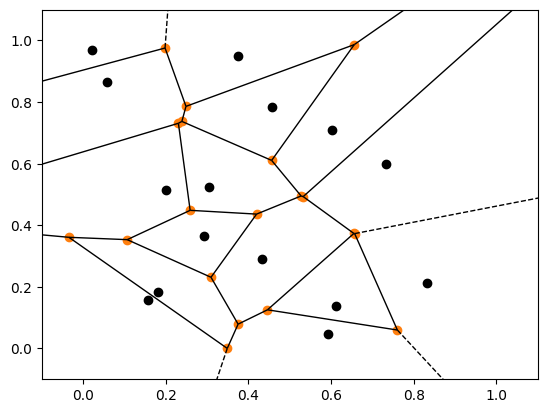

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate some random points
np.random.seed(42)
points = np.random.rand(15, 2)  # 15 points in 2D

# Compute the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)

# Plot the original points
ax.plot(points[:, 0], points[:, 1], 'ko')

# Set limits for the plot
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])

# Show the plot
plt.show()

In [19]:
print(vor)

Lengths of ridges surrounding point 7: [0.02667662371751016, 0.026662615931976615, 0.10059107583808286, 0.06535000755170475, 0.021288714127701093, 0.04918411903253976, 0.0047543901680882515]


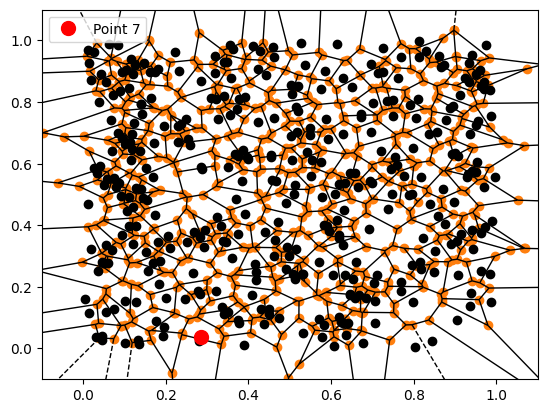

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate some random points
#np.random.seed(42)
points = np.random.rand(350,2)  # 15 points in 2D

# Compute the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)

# Plot the original points
ax.plot(points[:, 0], points[:, 1], 'ko')

# Set limits for the plot
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])

# Function to calculate the Euclidean distance between two points
def calculate_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Function to get the lengths of ridges surrounding a specific point
def get_ridge_lengths_for_point(vor, point_index):
    ridge_lengths = []
    for ridge_index, ridge in enumerate(vor.ridge_points):
        if point_index in ridge:
            # Get the vertices of the ridge
            ridge_vertices = vor.ridge_vertices[ridge_index]
            if -1 not in ridge_vertices:  # Skip infinite ridges
                v1, v2 = vor.vertices[ridge_vertices[0]], vor.vertices[ridge_vertices[1]]
                length = calculate_distance(v1, v2)
                ridge_lengths.append(length)
    return ridge_lengths

# Choose a specific point (e.g., the first point)
point_index = 7  # Change this to the index of the point you're interested in
ridge_lengths = get_ridge_lengths_for_point(vor, point_index)

# Print the lengths of the ridges surrounding the chosen point
print(f"Lengths of ridges surrounding point {point_index}: {ridge_lengths}")

# Highlight the chosen point
ax.plot(points[point_index, 0], points[point_index, 1], 'ro', markersize=10, label=f'Point {point_index}')
ax.legend()

# Show the plot
plt.show()

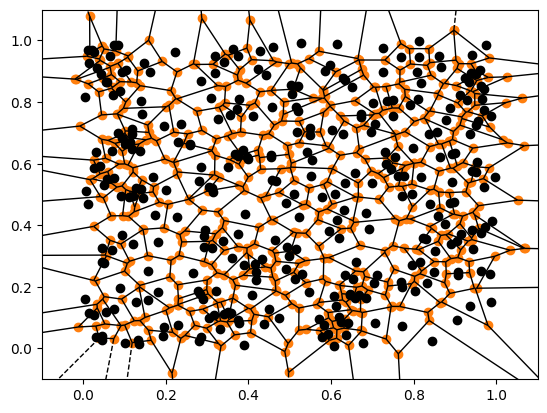

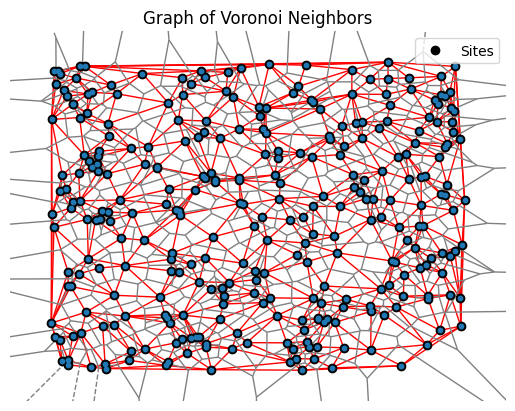

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import networkx as nx

# Generate some random points
np.random.seed(42)
points = np.random.rand(300, 2)  # 10 points in 2D

# Compute the Voronoi diagram
vor = Voronoi(points)
# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)

# Plot the original points
ax.plot(points[:, 0], points[:, 1], 'ko')

# Set limits for the plot
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
# Create a graph
G = nx.Graph()

# Add nodes (points) to the graph
for i, point in enumerate(points):
    G.add_node(i, pos=point)

# Add edges between nodes that share a Voronoi edge
for ridge in vor.ridge_points:
    G.add_edge(ridge[0], ridge[1])

# Get positions for the nodes (for visualization)
pos = nx.get_node_attributes(G, 'pos')

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray')

# Plot the original points
ax.plot(points[:, 0], points[:, 1], 'ko', label='Sites')

# Draw the graph
nx.draw(G, pos, ax=ax,  edge_color='red', node_size=10)

# Add legend and show the plot
ax.legend()
plt.title("Graph of Voronoi Neighbors")
plt.show()

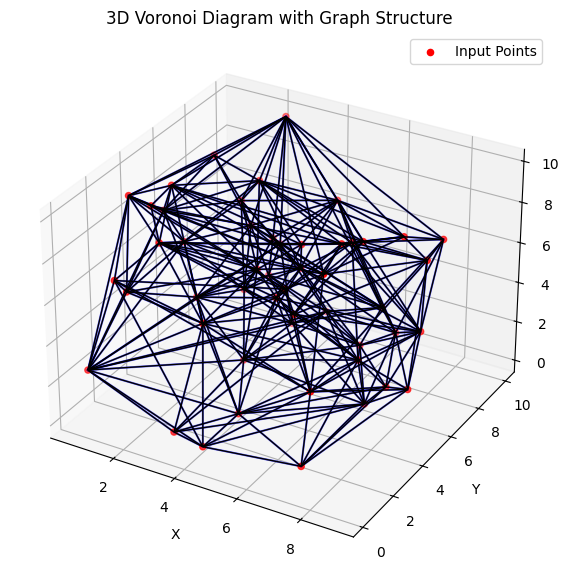

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from scipy.spatial import Voronoi
import networkx as nx

# Generate random points in 3D
num_points = 50
points = np.random.rand(num_points, 3) * 10  # Random points in a 10x10x10 cube

# Compute Voronoi diagram
vor = Voronoi(points)

# Create a graph where nodes are input points and edges are shared Voronoi ridges
G = nx.Graph()
for i, point in enumerate(points):
    G.add_node(i, pos=point)  # Add nodes with positions

# Add edges where Voronoi ridges exist between input points
ridge_vertices = vor.ridge_points
for p1, p2 in ridge_vertices:
    G.add_edge(p1, p2)

# Plot Voronoi vertices and edges
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot input points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='red', marker='o', label="Input Points")

# Plot Voronoi ridges
for p1, p2 in ridge_vertices:
    pt1, pt2 = points[p1], points[p2]
    ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], [pt1[2], pt2[2]], 'b-', alpha=0.6)

# Draw the graph edges
edges = [(points[i], points[j]) for i, j in G.edges]
edge_lines = [[(p1[0], p1[1], p1[2]), (p2[0], p2[1], p2[2])] for p1, p2 in edges]
ax.add_collection3d(Line3DCollection(edge_lines, colors='black', linewidths=1))

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Voronoi Diagram with Graph Structure')

plt.legend()
plt.show()


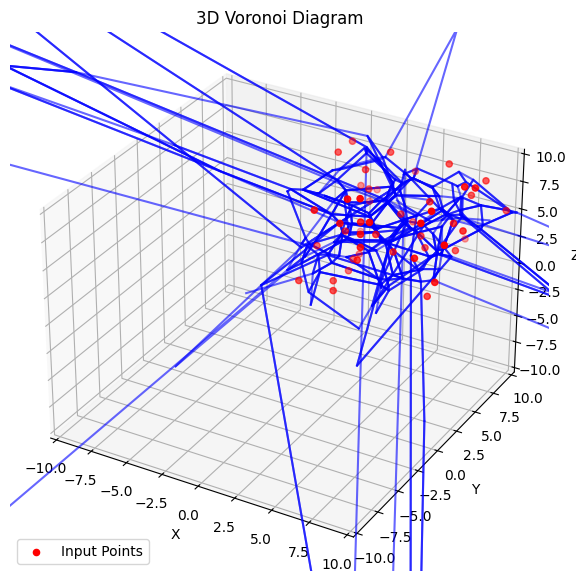

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from scipy.spatial import Voronoi

# Generate random points in 3D
num_points = 50
points = np.random.rand(num_points, 3) * 10  # Random points in a 10x10x10 cube

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot Voronoi diagram in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot input points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='red', marker='o', label="Input Points")

# Plot Voronoi ridges
ridge_vertices = vor.ridge_vertices
for ridge in ridge_vertices:
    if -1 not in ridge:  # Ignore ridges with infinite vertices
        line = [vor.vertices[i] for i in ridge]
        ax.plot(*zip(*line), 'b-', alpha=0.6)  # Blue lines for Voronoi ridges
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Voronoi Diagram')

plt.legend()
plt.show()
